<a href="https://colab.research.google.com/github/Nazneen-akram/NED-DL-Assignments/blob/main/Assignmenet_1_Regression_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION using DL Library Keras/Tensorflow

### Week 4 Assignment.


This is Concrete Strength Prediction dataset. You would be required to follow the instructions below to make a regression model to measure the concrete strength.
For test purpose, use 10% of data as test.

### Dated: 16.10.2023

#### Setting up Libraries

In [58]:
#imports here
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

#### Loading Data

In [3]:
concrete_data = pd.read_csv("https://cocl.us/concrete_data")

#### Getting basic info and feel of the data

In [4]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Get the data feel using pandas methods of `describe`/`info`

In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Check for basics like `shape`,`no of samples`

In [7]:
# Get the shape of the dataframe
print("Shape of the DataFrame: ", concrete_data.shape)

Shape of the DataFrame:  (1030, 9)


In [8]:
# Get the number of samples
print("Number of samples: ", len(concrete_data))

Number of samples:  1030


In [ ]:
#check if there are null values, and discard null values

#### Check if there are `null` values, and discard `null` values

In [9]:
# Check for null values
null_values = concrete_data.isnull().sum()
print("Null values in DataFrame: \n", null_values)

if null_values.any() == 0:
    print("There are no null values in the dataset")

Null values in DataFrame: 
 Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64
There are no null values in the dataset


In [ ]:
## so the data is free from null values, we can safely go ahead

#### Splitting data into predictors/features and target labels

*   List item
*   List item



In [ ]:
#X =      (features)

In [10]:
# In this code, drop is used to remove the ‘Strength’ column from the features,
# and the remaining columns are used as features.
X = concrete_data.drop('Strength', axis=1)  # Features

print("Features: \n")
X.head()

Features: 



,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
#y =        # targets

In [11]:
# The "Strength" columns is used as the target
y = concrete_data[['Strength']]  # Target

print("Targets: \n")
y.head()

Targets: 



,Strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [ ]:
# check if any of the fetures is non-numeric (categorical/ordinal). if found convert these to ohe or other accordingly

In [12]:
# Check if any features are non-numeric
if X.select_dtypes(exclude=['number']).empty:
    print("All features are numeric.")
else:
    print("Non-numeric features found:\n", X.select_dtypes(exclude=['number']))

All features are numeric.


### Train_Test Split

In [ ]:
#Split the data into train / test 90:10 ratio. and keep test data separate for final test

In [13]:
# Assuming X is your features and y is your target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training set size (features): ", X_train.shape)
print("Test set size (features): ", X_test.shape)

Training set size (features):  (927, 8)
Test set size (features):  (103, 8)


### Defining Model function

In [ ]:
# define the regression model, use of no. of layers / units is upto you.

In [14]:
# Define the regression model
model_A = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

In [ ]:
#add model.compile step

In [15]:
# Compile the model
model_A.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### A. Building a baseline model

#### Model fitting and evaluation (with non_normalized data, epochs=50) -- repeated 50 times

In [ ]:
#use model.fit with non-normalized data.

In [16]:
# Fit the regression model with non-normalized data
history_A=model_A.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 1s 9ms/step - loss: 1185.3883 - val_loss: 199.1711
Epoch 2/50
27/27 [==============================] - 0s 4ms/step - loss: 272.7638 - val_loss: 150.4497
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 177.0721 - val_loss: 134.1375
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 156.6973 - val_loss: 121.1959
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 124.5280 - val_loss: 116.4494
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 151.3807 - val_loss: 109.4640
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 102.5383 - val_loss: 129.2735
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 107.4605 - val_loss: 92.9546
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 87.4578 - val_loss: 88.2420
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 80.4310 - v

In [ ]:
# evaluate mode using test data and print accuracy

In [18]:
y_pred = model_A.predict(X_test)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[41.201138 ],
       [46.437054 ],
       [68.61215  ],
       [43.77065  ],
       [11.626557 ],
       [45.581745 ],
       [30.935131 ],
       [49.916157 ],
       [32.62241  ],
       [50.7271   ],
       [33.132442 ],
       [15.78375  ],
       [55.921604 ],
       [36.64323  ],
       [24.81882  ],
       [29.207073 ],
       [34.678608 ],
       [23.010166 ],
       [38.56023  ],
       [27.658833 ],
       [44.352543 ],
       [40.97546  ],
       [51.011814 ],
       [17.233692 ],
       [31.724693 ],
       [37.72579  ],
       [ 9.581464 ],
       [48.63341  ],
       [51.762432 ],
       [17.456974 ],
       [47.0715   ],
       [38.64446  ],
       [52.97401  ],
       [52.665066 ],
       [19.924862 ],
       [32.879612 ],
       [32.432247 ],
       [44.82768  ],
       [13.953824 ],
       [52.480892 ],
       [18.35645  ],
       [ 7.7561536],
       [44.191998 ],
       [55.983166 ],
       [12.484059 ],
       [76.064064 ],
       [56.303516 ],
       [38.70

In [21]:
# Calculate Mean Squared Error (MSE) for model A (non-normalized data run on epoch=50)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

Mean Squared Error (MSE):  44.30598845265238


## B. Modeling and Evaluation using 'normalized data'

#### Features Normalization

In [ ]:
# use normalization of the cleaned data (obtained after null checking)

In [25]:
# Create a StandardScaler instance
scaler = StandardScaler()

X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#### train_test split

In [ ]:
#train test split
#from sklearn.model_selection import train_test_split
#X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)

In [26]:
# X_normalized is your normalized features and y is your target
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_normalized, y, test_size=0.1, random_state=42)

print("Training set size (features): ", X_train_norm.shape)
print("Test set size (features): ", X_test_norm.shape)

Training set size (features):  (927, 8)
Test set size (features):  (103, 8)


### Modeling & evaluation

In [ ]:
#create model with same no. of layers / units and see impact of normalized data on accuracy

In [31]:
# Define the regression model with the same architecture using normalized data
model_B = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_norm.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

# Change optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model_B.compile(optimizer=optimizer, loss='mean_squared_error')

# Print the model summary
model_B.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1152      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Fit the model with the normalized training data and epoch=50
history_B = model_B.fit(X_train_norm, y_train, epochs=50, batch_size=32,validation_split=0.1)

Epoch 1/50
27/27 [==============================] - 2s 9ms/step - loss: 596.7595 - val_loss: 214.9145
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 188.4045 - val_loss: 141.6548
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 146.6484 - val_loss: 125.2826
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 132.5848 - val_loss: 111.5901
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 92.4234 - val_loss: 71.6705
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 67.8946 - val_loss: 55.2231
Epoch 7/50
27/27 [==============================] - 0s 4ms/step - loss: 57.6535 - val_loss: 46.7551
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 73.5145 - val_loss: 61.2615
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 57.1010 - val_loss: 81.0543
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 55.9381 - val_loss:

In [ ]:
#evaluate model and print accuracy

In [33]:
# Evaluate the model on the normalized test data
mse50 = model_B.evaluate(X_test_norm, y_test)
print("Mean Squared Error (MSE) on test data:", mse50)

4/4 [==============================] - 0s 3ms/step - loss: 39.7169
Mean Squared Error (MSE) on test data: 39.7169189453125


### Comparison of loss(MSE) / Accuracy between A & B (non-normalized data vs normalized data)

In [ ]:
# print mse / accuracy

In [34]:
# Make predictions on non-normalized test data
y_pred_A = model_A.predict(X_test)

# Calculate Mean Squared Error (MSE) for non-normalized data
mse_non_normalized = mean_squared_error(y_test, y_pred_A)

# Make predictions on normalized test data
y_pred_norm = model_B.predict(X_test_norm)

# Calculate Mean Squared Error (MSE) for normalized data
mse_normalized = mean_squared_error(y_test, y_pred_norm)

# Print the MSE for both non-normalized and normalized data
print("Mean Squared Error (MSE) for non-normalized data:", mse_non_normalized)
print("Mean Squared Error (MSE) for normalized data:", mse_normalized)

4/4 [==============================] - 0s 3ms/step
Mean Squared Error (MSE) for non-normalized data: 44.30598845265238
Mean Squared Error (MSE) for normalized data: 39.71691922263585


## C. Repeating B with 100 epochs

In [ ]:
#train model at B. with 100 epochs

In [35]:
model_C = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)),  # Input layer
    keras.layers.Dense(32, activation='relu'),  # Hidden layer
    keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model_C.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model_C.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                576       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Fit the model with the normalized training data
history_C=model_C.fit(X_train_norm, y_train, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 1522.3956 - val_loss: 1431.4701
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 1347.2913 - val_loss: 1201.0338
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 1043.4801 - val_loss: 844.2598
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 652.6108 - val_loss: 463.2587
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 335.4867 - val_loss: 242.7122
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 222.7232 - val_loss: 191.7002
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 202.6849 - val_loss: 179.8174
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 191.5295 - val_loss: 171.3299
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 182.3323 - val_loss: 165.8635
Epoch 10/100
27/27 [==============================] - 0s 3ms/step - 

In [ ]:
#evaluate and store accuracy

In [37]:
# Evaluate the model using the test data and epoch=100
mse100 = model_C.evaluate(X_test_norm, y_test)

# Print the MSE
print("Mean Squared Error (MSE) after 100 epochs:", mse100)

4/4 [==============================] - 0s 3ms/step - loss: 39.9558
Mean Squared Error (MSE) after 100 epochs: 39.95580291748047


### Comparison of MSE between B & C (increasing epochs=50 to epochs=100)

In [ ]:
# print MSE (error) and Accuracy between B, C

In [38]:
# Compare the MSE between epoch 50 and epoch 100
if mse100 < mse50:
    print("MSE improved from 50 epochs to 100 epochs.")
elif mse100 > mse50:
    print("MSE deteriorated from 50 epochs to 100 epochs.")
else:
    print("MSE remained the same from 50 epochs to 100 epochs.")

print(mse50, mse100)

MSE deteriorated from 50 epochs to 100 epochs.
39.7169189453125 39.95580291748047


## D. Optimized the number of hidden layers using counts 3,4,...

### Model  fitting and evaluation

In [ ]:
# create model as above

In [42]:
# Define the number of hidden layers to try
hidden_layers = [3, 4]

for i in hidden_layers:
    # Initialize the model
    model_D = Sequential()
    model_D.add(Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)))  # Input layer

    # Add hidden layers
    for _ in range(i):
        model_D.add(Dense(32, activation='relu'))  # Hidden layer

    model_D.add(Dense(1))  # Output layer (1 neuron for regression)

    # Compile the model
    model_D.compile(optimizer='adam', loss='mean_squared_error')

    # Print the model summary
    model_D.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                576       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 32)                1056      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4801 (18.75 KB)
Trainable params: 4801 (18.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_7

In [48]:
  # Train the model with the normalized training data for 100 epochs
history_D = model_D.fit(X_train_norm, y_train, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 0s 7ms/step - loss: 14.7104 - val_loss: 35.5298
Epoch 2/100
27/27 [==============================] - 0s 5ms/step - loss: 14.4494 - val_loss: 33.0891
Epoch 3/100
27/27 [==============================] - 0s 5ms/step - loss: 15.1305 - val_loss: 29.9870
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 13.4486 - val_loss: 29.1294
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 14.4008 - val_loss: 29.5310
Epoch 6/100
27/27 [==============================] - 0s 4ms/step - loss: 14.2116 - val_loss: 29.3846
Epoch 7/100
27/27 [==============================] - 0s 4ms/step - loss: 13.3202 - val_loss: 28.1375
Epoch 8/100
27/27 [==============================] - 0s 4ms/step - loss: 13.3986 - val_loss: 28.9627
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 17.3430 - val_loss: 27.2887
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - loss: 12.9780 - val_los

In [ ]:
#repeate checking accuracy as above

In [49]:
    # Evaluate the model on the normalized test data
    mse100_D = model_D.evaluate(X_test_norm, y_test)

    print(f"Mean Squared Error (MSE) with hidden layers:", mse100_D)

4/4 [==============================] - 0s 3ms/step - loss: 35.8096
Mean Squared Error (MSE) with hidden layers: 35.80955505371094


## Comparison of MSE between C & D (increasing number of hidden layers)

In [ ]:
#print mse / accuracy

In [50]:
# Compare the MSE between epoch 50 and epoch 100
if mse100 > mse100_D:
    print("MSE for Model D is less than Model C")
elif mse100 < mse100_D:
    print("MSE for Model D is higher than Model C")
else:
    print("MSE remained the same for both Model C & D.")

print(mse100_D, mse100)

MSE for Model D is less than Model C
35.80955505371094 39.95580291748047


### Conclusion

## E. Increasing the no. of units of hidden layers (16, 32,64,96, ... style)

### Model  fitting and evaluation

In [ ]:
# create model as above

In [51]:
# Define the number of units in hidden layers to try
hidden_units = [16, 32, 64, 96]

for i in hidden_units:
    # Initialize the model
    model_E = Sequential()
    model_E.add(Dense(64, activation='relu', input_shape=(X_train_norm.shape[1],)))  # Input layer

    # Add hidden layer with 'i' units
    model_E.add(Dense(i, activation='relu'))  # Hidden layer

    model_E.add(Dense(1))  # Output layer (1 neuron for regression)

    # Compile the model
    model_E.compile(optimizer='adam', loss='mean_squared_error')

    # Print the model summary
    model_E.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 64)                576       
                                                                 
 dense_48 (Dense)            (None, 16)                1040      
                                                                 
 dense_49 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1633 (6.38 KB)
Trainable params: 1633 (6.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                576       
                                                                

In [53]:
history_E = model_E.fit(X_train_norm, y_train, epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 1485.9330 - val_loss: 1343.0986
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 1210.5549 - val_loss: 992.4623
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 783.9019 - val_loss: 529.6675
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 363.6484 - val_loss: 231.8699
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 215.9669 - val_loss: 183.2398
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 199.7480 - val_loss: 171.7146
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - loss: 189.4390 - val_loss: 165.5651
Epoch 8/100
27/27 [==============================] - 0s 3ms/step - loss: 181.5200 - val_loss: 160.2473
Epoch 9/100
27/27 [==============================] - 0s 4ms/step - loss: 174.4688 - val_loss: 154.3192
Epoch 10/100
27/27 [==============================] - 0s 4ms/step - lo

In [ ]:
#repeate checking accuracy as above

In [54]:
  # Evaluate the model on the normalized test data
mse100_E = model_D.evaluate(X_test_norm, y_test)
print(f"Mean Squared Error (MSE) with hidden layers:", mse100_E)

4/4 [==============================] - 0s 3ms/step - loss: 31.4474
Mean Squared Error (MSE) with hidden layers: 31.44735336303711


## Comparison of MSE between C & D (increasing number of hidden layers)

In [ ]:
#print mse / accuracy

In [56]:
# Compare the MSE between Model D and Model E
if mse100_E > mse100_D:
    print("MSE for Model D is less than Model E")
elif mse100_E < mse100_D:
    print("MSE for Model E is less than Model D")
else:
    print("MSE remained the same for both Model D & E.")

print(mse100_D, mse100_E)

MSE for Model E is less than Model D
35.80955505371094 31.44735336303711


In [ ]:
#plots of loss / accuracy (as in chapter 4 taught) usning history dictionary keys.
# write what you saw when using non-normalized vs normalized data, increased epochs, layers and units.|

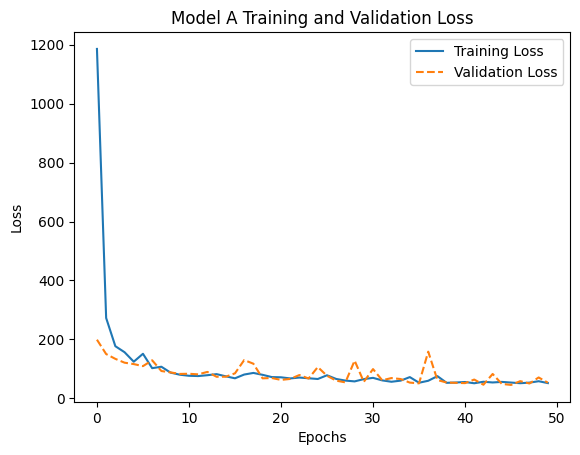

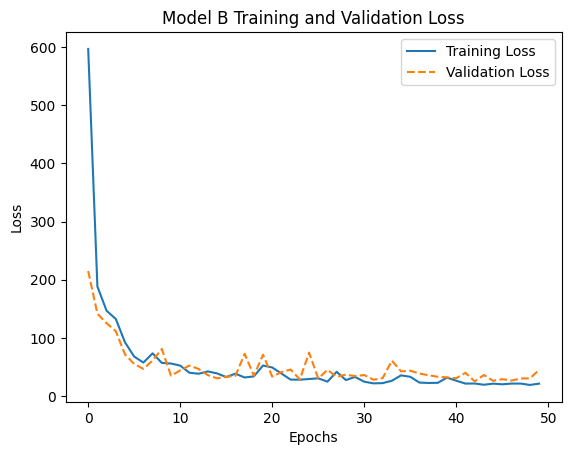

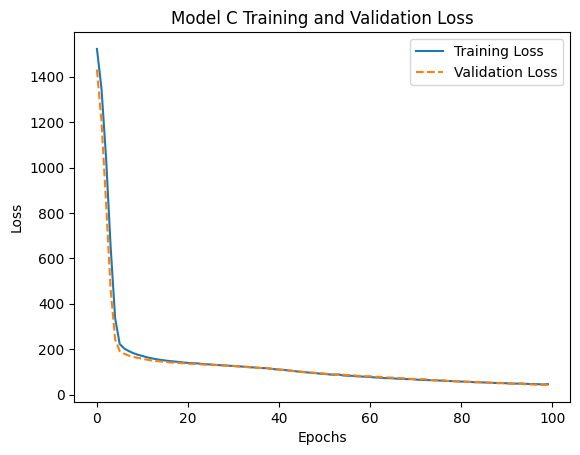

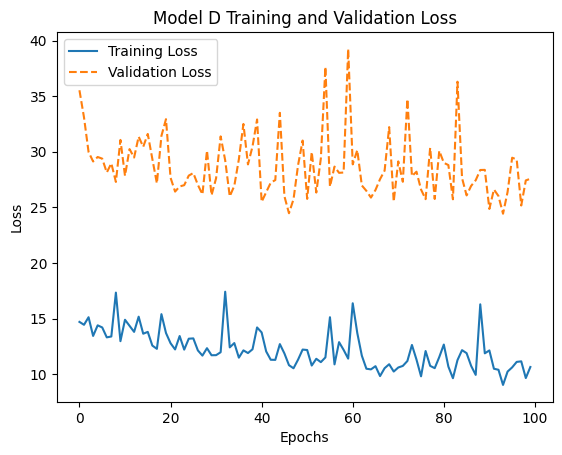

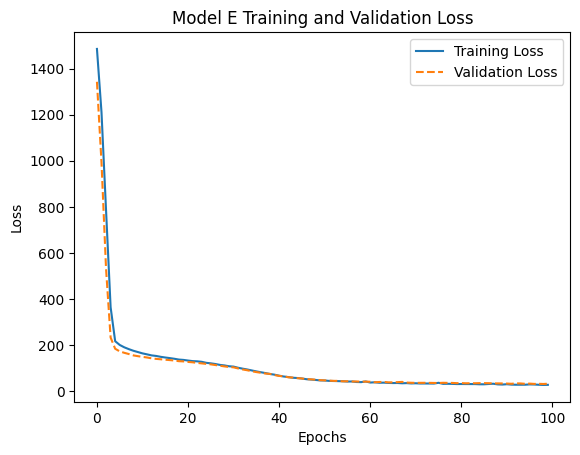

In [57]:
import matplotlib.pyplot as plt

# Assuming history_A to history_E are your Keras History objects
histories = [history_A, history_B, history_C, history_D, history_E]
model_names = ['Model A', 'Model B', 'Model C', 'Model D', 'Model E']

for i, history in enumerate(histories):
    plt.figure(i)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], '--', label='Validation Loss')
    plt.title(f'{model_names[i]} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### It is therefore evident that;
#### -normalization the data, improved Accuracy and lowered the MSE
#### -increasing the number of epochs seems to have overfitted the data
#### -increasing the number of layers seems to have increased biased
#### -and increasing the number of units seems to have achieved greater accuracy

1. You can use model name as modelA, modelB etc. for sections A,B,....to avoid error.
2. MSE is mean squared error normally used in regression problems